In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#Read the train data
rosman_train_data = pd.read_csv("../data/train.csv")

/Users/sara/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rosman_train_data.head(3)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0


In [4]:
rosman_train_data.tail(3)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
637771,2014-07-31,754.0,4.0,10564.0,1162.0,1.0,1.0,0,NaN
637772,2014-07-31,755.0,4.0,12302.0,1020.0,1.0,1.0,0,1.0
637773,2014-07-31,751.0,4.0,3913.0,539.0,1.0,1.0,0,1.0


In [5]:
#Read the store data
rosman_store_data = pd.read_csv("../data/store.csv")

In [6]:
rosman_store_data.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [7]:
rosman_train_data.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [8]:
rosman_store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [9]:
#Check if there are nulls in train data
rosman_train_data.isnull().any().any()

True

In [10]:
#Check if there are nulls in store data
rosman_store_data.isnull().any().any()

True

In [11]:
#Check which columns of train data have null values
rosman_train_data.isnull().any()

Date             False
Store             True
DayOfWeek         True
Sales             True
Customers         True
Open              True
Promo             True
StateHoliday      True
SchoolHoliday     True
dtype: bool

In [12]:
#Check which columns of store data have null values
rosman_store_data.isnull().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [13]:
#Merge the train data with store data
rosman_df = rosman_train_data.merge(rosman_store_data, how='left', on='Store')

In [14]:
rosman_df.head(3)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0,d,c,5350.0,NaN,NaN,1.0,22.0,2012.0,"Mar,Jun,Sept,Dec"
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0,d,a,6630.0,NaN,NaN,0.0,NaN,NaN,NaN
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0,a,c,2140.0,8.0,2012.0,0.0,NaN,NaN,NaN


In [15]:
#Remove the null targets (i.e. Sales)
null_Sales = rosman_df[rosman_df['Sales'].isnull()]
rosman_df_new = rosman_df[~rosman_df.index.isin(null_Sales.index)]

In [16]:
rosman_df_new.isnull().any()

Date                         False
Store                         True
DayOfWeek                     True
Sales                        False
Customers                     True
Open                          True
Promo                         True
StateHoliday                  True
SchoolHoliday                 True
StoreType                     True
Assortment                    True
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                        True
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [17]:
#Remove the Cusomers column
rosman_df_new = rosman_df_new.drop('Customers', axis=1)

In [18]:
rosman_df_new.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [19]:
rosman_df_new.shape

(618747, 17)

In [20]:
rosman_df_new.loc[:, 'Store'].nunique()

1115

In [21]:
rosman_df_new.loc[:, 'DayOfWeek'].nunique()

7

In [22]:
rosman_df_new.loc[:, 'DayOfWeek'].unique()

array([ 2., nan,  3.,  4.,  5.,  6.,  7.,  1.])

In [23]:
rosman_df_new.loc[:, 'Open'].nunique()

2

In [24]:
rosman_df_new.loc[:, 'Open'].unique()

array([ 0.,  1., nan])

In [25]:
rosman_df_new.loc[:, 'Promo'].nunique()

2

In [26]:
rosman_df_new.loc[:, 'Promo'].unique()

array([ 0., nan,  1.])

In [27]:
rosman_df_new.loc[:, 'StateHoliday'].unique()

array(['a', nan, '0', 'b', 'c', 0.0], dtype=object)

In [28]:
rosman_df_new.loc[:, 'SchoolHoliday'].unique()

array([ 1., nan,  0.])

In [29]:
rosman_df_new.loc[:, 'StoreType'].unique()

array(['d', 'a', 'c', 'b', nan], dtype=object)

<AxesSubplot:>

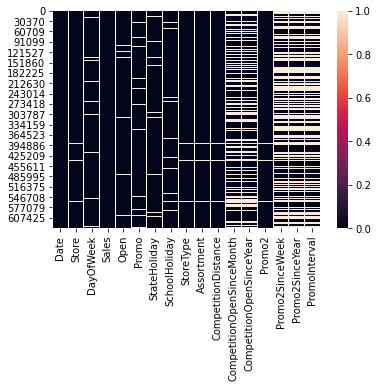

In [30]:
#Check the null values using heatmap
nulls = rosman_df_new.isnull()
sns.heatmap(nulls)

In [31]:
#Remove nulls from the columns listed below
for column in ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
               'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2']:
    all_nulls = rosman_df_new[rosman_df_new[column].isnull()]
    rosman_df_new = rosman_df_new[~rosman_df_new.index.isin(all_nulls.index)]

In [32]:
rosman_df_new.shape

(513483, 17)

In [33]:
rosman_df_new.isnull().any()

Date                         False
Store                        False
DayOfWeek                    False
Sales                        False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

<AxesSubplot:>

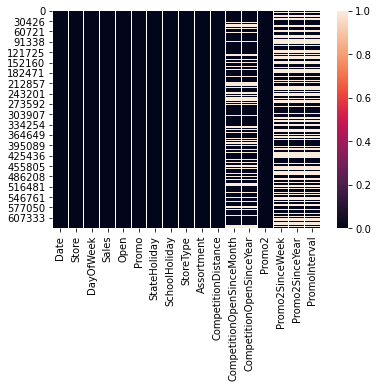

In [34]:
nullies = rosman_df_new.isnull()
sns.heatmap(nullies)

In [35]:
rosman_df_new.shape

(513483, 17)

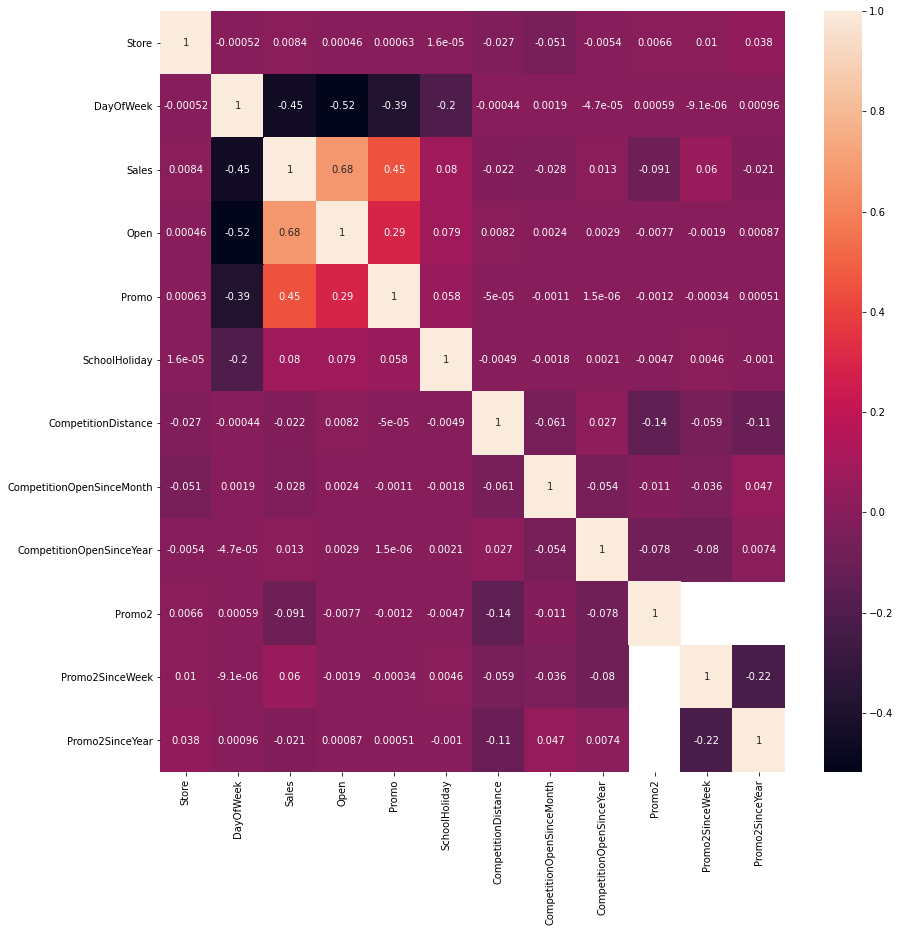

In [36]:
#Check the correlations
corrMatrix = rosman_df_new.corr()
fig = plt.figure(figsize=(14,14))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [37]:
rosman_df_new.dtypes

Date                          object
Store                        float64
DayOfWeek                    float64
Sales                        float64
Open                         float64
Promo                        float64
StateHoliday                  object
SchoolHoliday                float64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                       float64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [38]:
rosman_df_new.loc[:,'Sales'].describe()

count    513483.000000
mean       5670.948199
std        3807.853244
min           0.000000
25%        3649.000000
50%        5631.000000
75%        7716.000000
max       38037.000000
Name: Sales, dtype: float64

In [39]:
#Split the data into training and cross validation samples
#The last 3 months go to the validation sample
split_date = '2014-05-01'

df_train = rosman_df_new.loc[rosman_df_new.loc[:, 'Date'] < split_date, :]
df_cv = rosman_df_new.loc[rosman_df_new.loc[:, 'Date'] >= split_date, :]

In [40]:
df_train.tail()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
540767,2014-04-30,742.0,3.0,13178.0,1.0,1.0,0,0.0,d,c,4380.0,NaN,NaN,0.0,NaN,NaN,NaN
540768,2014-04-30,743.0,3.0,4680.0,1.0,1.0,0,0.0,a,a,6710.0,11.0,2003.0,1.0,14.0,2012.0,"Jan,Apr,Jul,Oct"
540770,2014-04-30,745.0,3.0,10644.0,1.0,1.0,0,0.0,a,a,17650.0,11.0,2013.0,1.0,37.0,2009.0,"Jan,Apr,Jul,Oct"
540771,2014-04-30,746.0,3.0,8316.0,1.0,1.0,0,0.0,d,c,4330.0,2.0,2011.0,1.0,35.0,2011.0,"Mar,Jun,Sept,Dec"
540773,2014-04-30,741.0,3.0,12208.0,1.0,1.0,0,0.0,d,c,11900.0,NaN,NaN,0.0,NaN,NaN,NaN


In [41]:
df_cv.head()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
540774,2014-05-01,372.0,4.0,0.0,0.0,1.0,a,0.0,d,c,4880.0,8.0,2010.0,1.0,18.0,2014.0,"Jan,Apr,Jul,Oct"
540775,2014-05-01,368.0,4.0,0.0,0.0,1.0,a,0.0,d,c,1450.0,4.0,2005.0,1.0,45.0,2009.0,"Feb,May,Aug,Nov"
540776,2014-05-01,369.0,4.0,0.0,0.0,1.0,a,0.0,d,c,5870.0,4.0,2014.0,0.0,NaN,NaN,NaN
540778,2014-05-01,371.0,4.0,0.0,0.0,1.0,a,0.0,d,c,1970.0,7.0,2009.0,1.0,45.0,2014.0,"Feb,May,Aug,Nov"
540779,2014-05-01,373.0,4.0,0.0,0.0,1.0,a,0.0,d,c,11120.0,NaN,NaN,1.0,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [42]:
df_train.shape

(435339, 17)

In [43]:
df_cv.shape

(78144, 17)

In [46]:
df_train.loc[:, 'Sales'].mean()

5654.365887274055

In [53]:
df_train['Sales_mean'] = df_train.loc[:, 'Sales'].mean()

/Users/sara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_train.head()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,mean,Sales_mean
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,a,1.0,d,c,5350.0,NaN,NaN,1.0,22.0,2012.0,"Mar,Jun,Sept,Dec",5654.365887,5654.365887
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,a,1.0,d,a,6630.0,NaN,NaN,0.0,NaN,NaN,NaN,5654.365887,5654.365887
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,a,1.0,a,c,2140.0,8.0,2012.0,0.0,NaN,NaN,NaN,5654.365887,5654.365887
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,a,1.0,a,c,100.0,6.0,2010.0,1.0,18.0,2010.0,"Feb,May,Aug,Nov",5654.365887,5654.365887
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,a,1.0,a,a,160.0,8.0,2012.0,0.0,NaN,NaN,NaN,5654.365887,5654.365887


<AxesSubplot:>

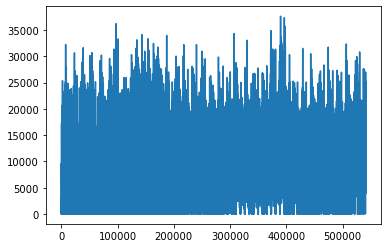

In [52]:
df_train.loc[:, 'Sales'].plot()

<AxesSubplot:xlabel='Date'>

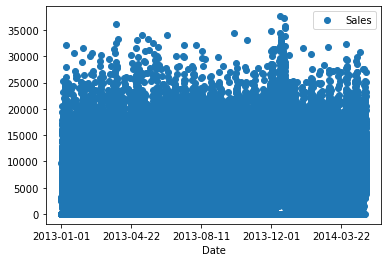

In [57]:
df_train.plot(x='Date', y='Sales', style='o')

<AxesSubplot:>

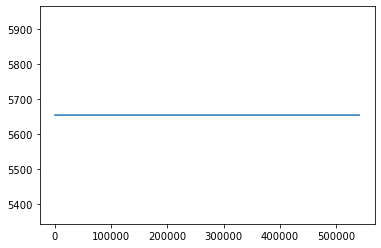

In [55]:
df_train.loc[:, 'Sales_mean'].plot()

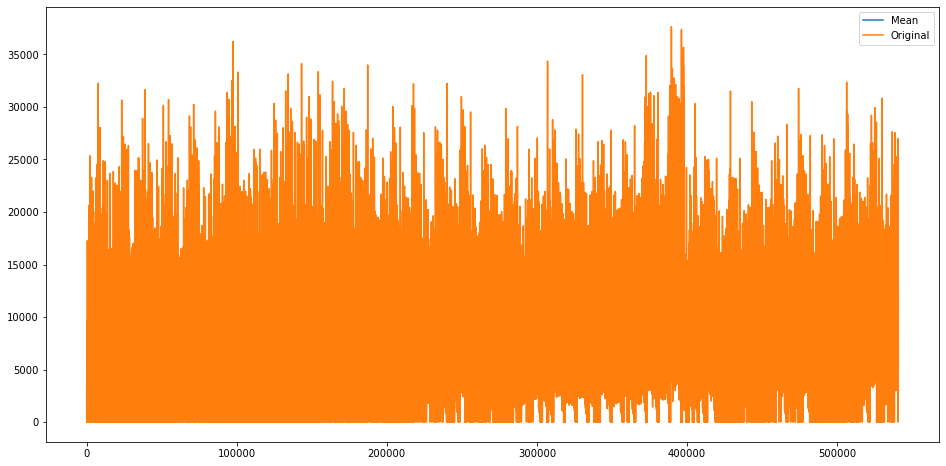

In [56]:
p1 = plt.figure(figsize=(16,8))
p1 = plt.plot(df_train['Sales_mean'], label='Mean')
p1 = plt.plot(df_train.loc[:, 'Sales'], label='Original')
p1 = plt.legend(loc='best')
plt.show()

In [61]:
df_train[df_train.loc[:, 'DayOfWeek'] == 3] 

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,mean,Sales_mean
1114,2013-01-02,371.0,3.0,7374.0,1.0,0.0,0,1.0,d,c,1970.0,7.0,2009.0,1.0,45.0,2014.0,"Feb,May,Aug,Nov",5654.365887,5654.365887
1115,2013-01-02,367.0,3.0,4052.0,1.0,0.0,0,1.0,d,c,2640.0,9.0,2012.0,0.0,NaN,NaN,NaN,5654.365887,5654.365887
1117,2013-01-02,369.0,3.0,6063.0,1.0,0.0,0,1.0,d,c,5870.0,4.0,2014.0,0.0,NaN,NaN,NaN,5654.365887,5654.365887
1118,2013-01-02,370.0,3.0,5462.0,1.0,0.0,0,1.0,d,a,8250.0,10.0,2000.0,1.0,31.0,2009.0,"Jan,Apr,Jul,Oct",5654.365887,5654.365887
1119,2013-01-02,372.0,3.0,8014.0,1.0,0.0,0,1.0,d,c,4880.0,8.0,2010.0,1.0,18.0,2014.0,"Jan,Apr,Jul,Oct",5654.365887,5654.365887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540767,2014-04-30,742.0,3.0,13178.0,1.0,1.0,0,0.0,d,c,4380.0,NaN,NaN,0.0,NaN,NaN,NaN,5654.365887,5654.365887
540768,2014-04-30,743.0,3.0,4680.0,1.0,1.0,0,0.0,a,a,6710.0,11.0,2003.0,1.0,14.0,2012.0,"Jan,Apr,Jul,Oct",5654.365887,5654.365887
540770,2014-04-30,745.0,3.0,10644.0,1.0,1.0,0,0.0,a,a,17650.0,11.0,2013.0,1.0,37.0,2009.0,"Jan,Apr,Jul,Oct",5654.365887,5654.365887
540771,2014-04-30,746.0,3.0,8316.0,1.0,1.0,0,0.0,d,c,4330.0,2.0,2011.0,1.0,35.0,2011.0,"Mar,Jun,Sept,Dec",5654.365887,5654.365887
